In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, :2]
y = wine.target

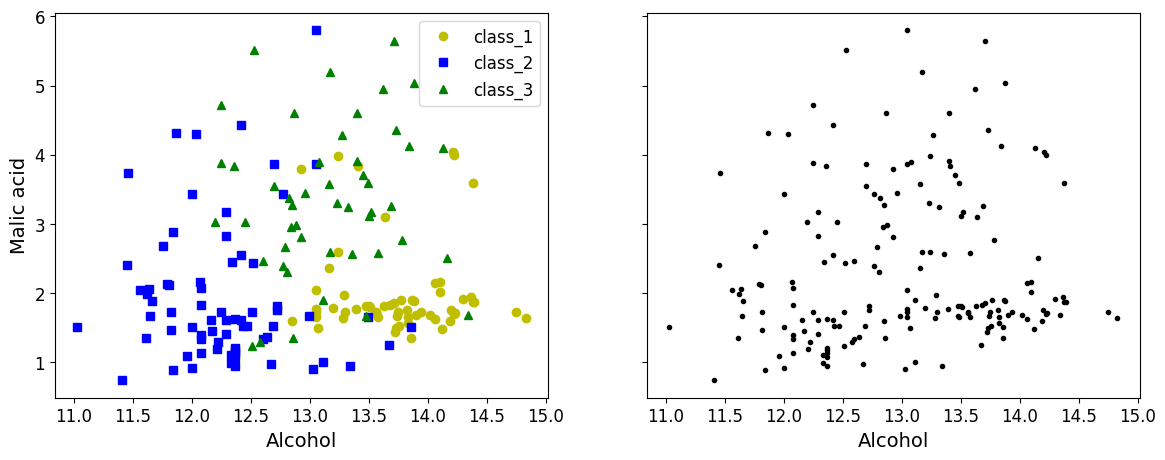

In [3]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="class_1")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="class_2")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="class_3")
plt.xlabel("Alcohol", fontsize=14)
plt.ylabel("Malic acid", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("Alcohol", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [4]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-0.8, 0.9],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  0.8]])
blob_std = np.array([0.4, 0.3, 0.2, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=48)

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

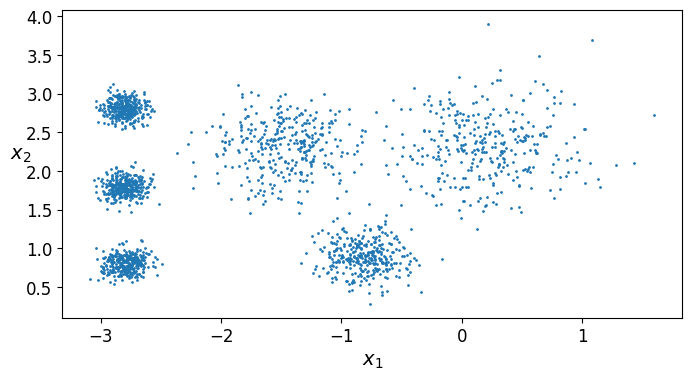

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [7]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters=k, random_state=48)
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([3, 0, 5, ..., 3, 2, 2])

In [9]:
y_pred is kmeans.labels_

True

In [10]:
kmeans.cluster_centers_

array([[-2.78998306,  0.80373079],
       [-2.80282498,  2.80416996],
       [-1.45999585,  2.32349119],
       [ 0.21550796,  2.3301643 ],
       [-2.79700676,  1.79373234],
       [-0.8068359 ,  0.90616456]])

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 3, 1, 1])

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

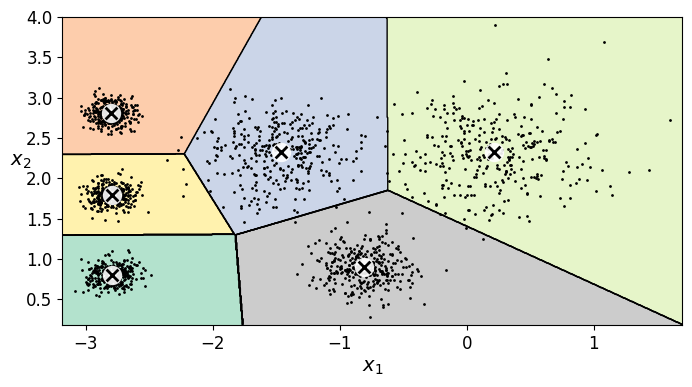

In [13]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [14]:
kmeans.transform(X_new)

array([[3.03563264, 2.91590762, 1.49540444, 0.3942742 , 2.80460214,
        1.35921306],
       [5.91227231, 5.85828193, 4.47171215, 2.80399793, 5.80067528,
        3.96086803],
       [2.20628774, 0.27789816, 1.68204547, 3.28453517, 1.22322848,
        3.03218001],
       [1.70922098, 0.36248773, 1.5500865 , 3.21999   , 0.73486071,
        2.71114002]])

In [15]:
kmeans_iter1 = KMeans(n_clusters=6, init="random", n_init=1, max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=6, init="random", n_init=1, max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=6, init="random", n_init=1, max_iter=3, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=6, n_init=1, random_state=0)

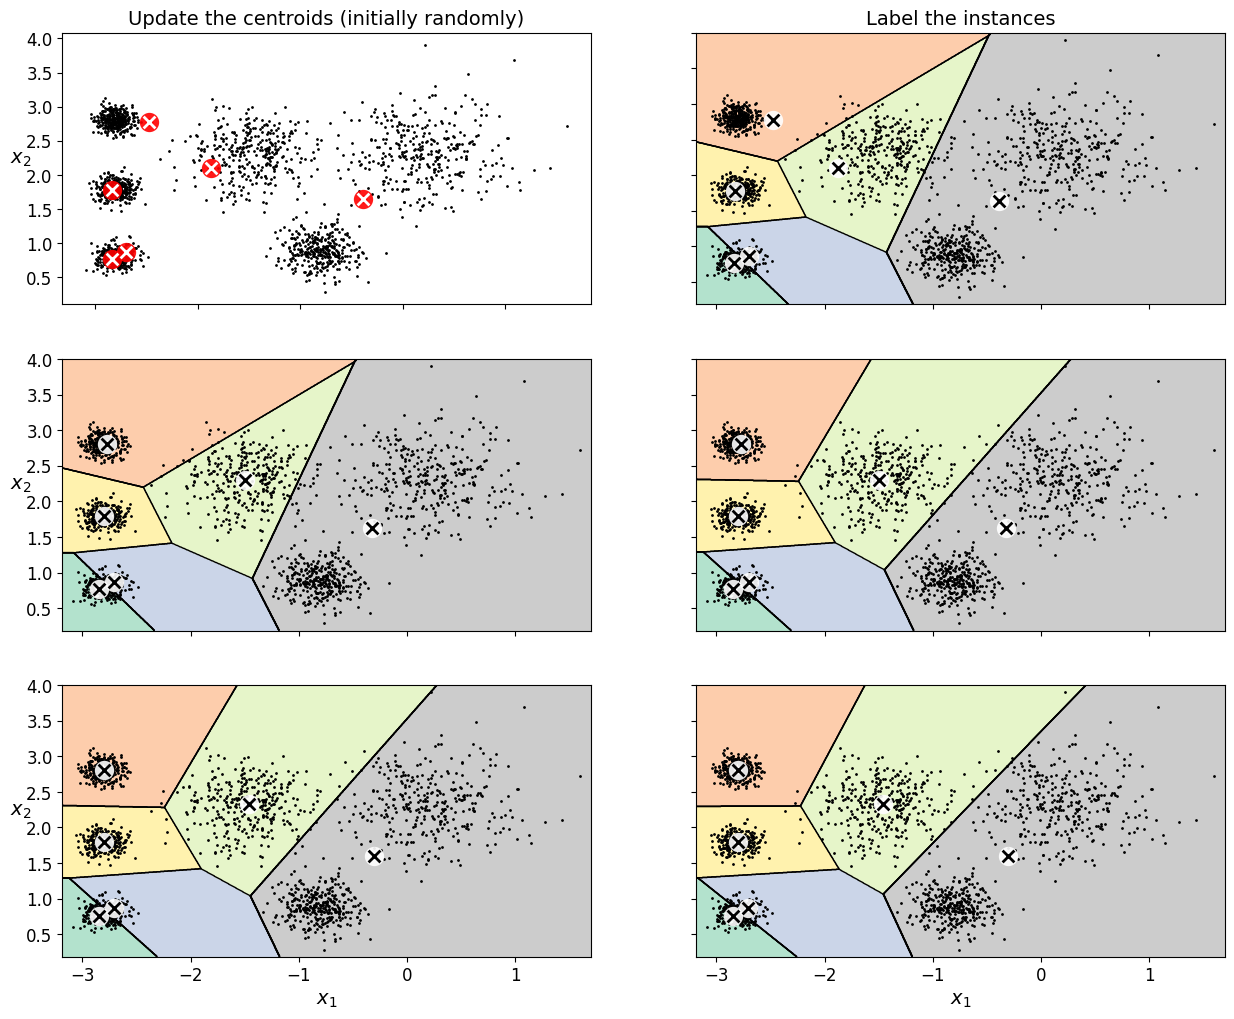

In [16]:
plt.figure(figsize=(15, 12))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [17]:
kmeans.inertia_

214.6600604193783

In [18]:
kmeans.score(X)

-214.66006041937828

In [19]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

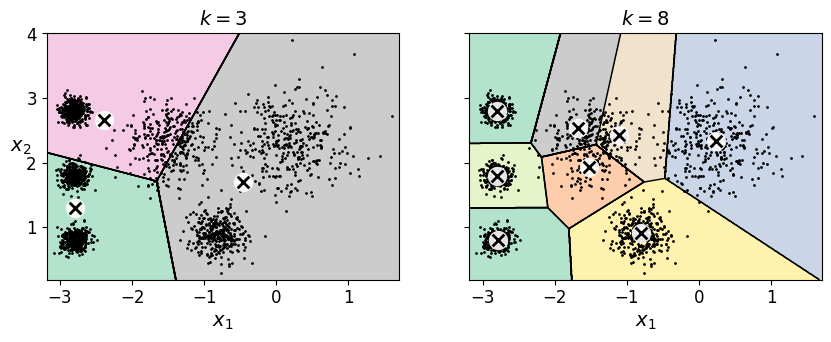

In [20]:
kmeans_k3 = KMeans(n_clusters=3, random_state=48)
kmeans_k8 = KMeans(n_clusters=8, random_state=48)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [21]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=48).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

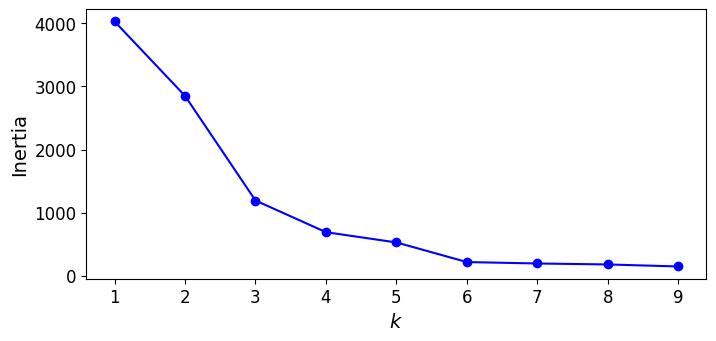

In [22]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.7163704374264178

In [24]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

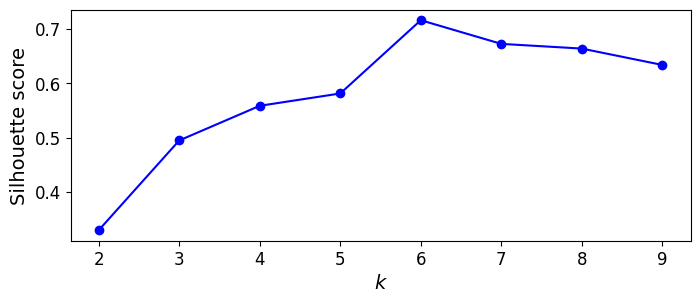

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

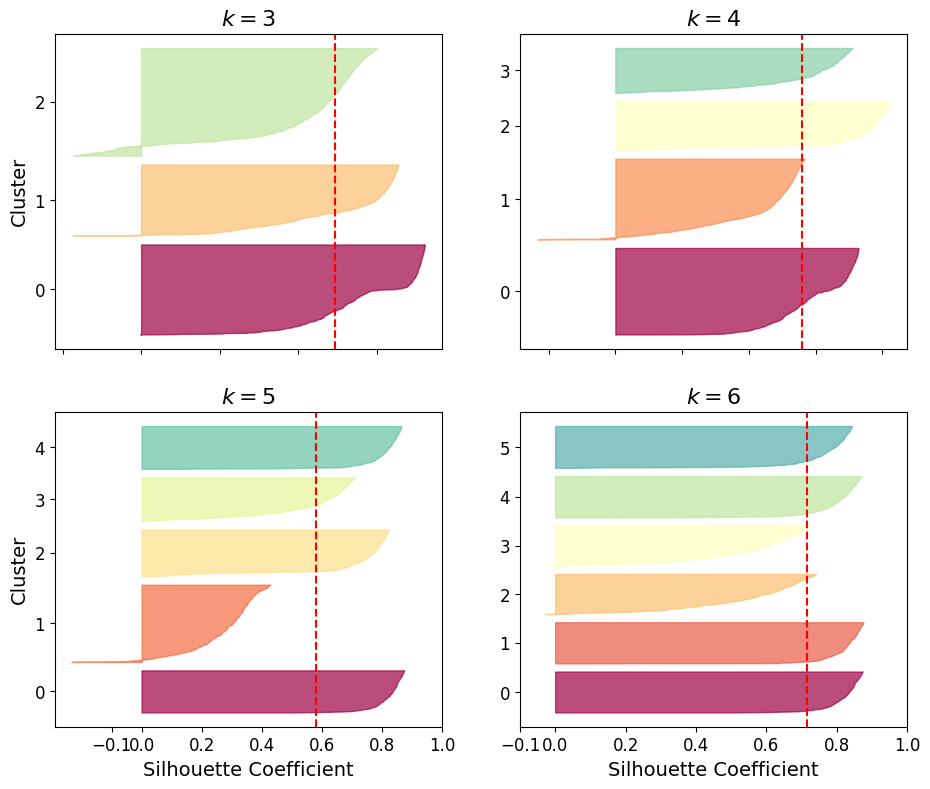

In [26]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [27]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=48)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=48)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

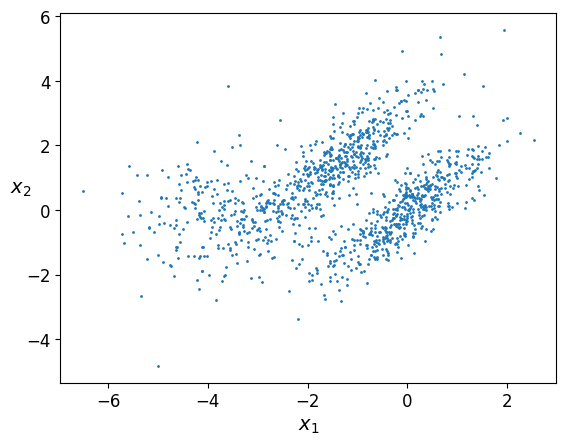

In [28]:
plot_clusters(X)

In [29]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=48)
kmeans_bad = KMeans(n_clusters=3, random_state=48)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=48)

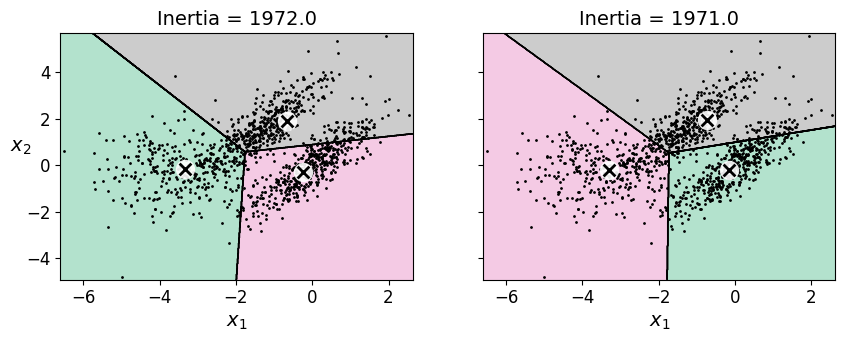

In [30]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

In [31]:
from matplotlib.image import imread
image = imread("california_poppy.png")
image.shape

(960, 1280, 3)

In [32]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=48).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [33]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=48).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

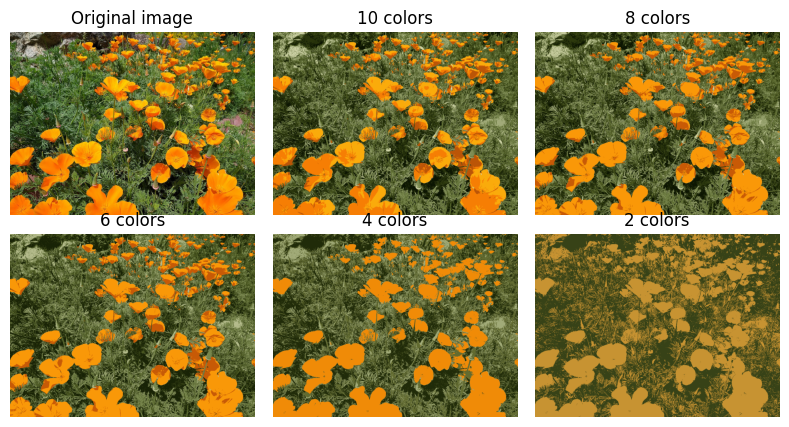

In [34]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [35]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=48)

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=48)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=48)

In [38]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9577777777777777

In [39]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=48)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=48)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=48)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=48))])

In [40]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV 1/3] END ..............kmeans__n_clusters=2;, score=0.332 total time=   0.0s
[CV 2/3] END ..............kmeans__n_clusters=2;, score=0.356 total time=   0.0s
[CV 3/3] END ..............kmeans__n_clusters=2;, score=0.454 total time=   0.0s
[CV 1/3] END ..............kmeans__n_clusters=3;, score=0.528 total time=   0.0s
[CV 2/3] END ..............kmeans__n_clusters=3;, score=0.586 total time=   0.0s
[CV 3/3] END ..............kmeans__n_clusters=3;, score=0.561 total time=   0.0s
[CV 1/3] END ..............kmeans__n_clusters=4;, score=0.581 total time=   0.0s
[CV 2/3] END ..............kmeans__n_clusters=4;, score=0.704 total time=   0.0s
[CV 3/3] END ..............kmeans__n_clusters=4;, score=0.619 total time=   0.0s
[CV 1/3] END ..............kmeans__n_clusters=5;, score=0.726 total time=   0.0s
[CV 2/3] END ..............kmeans__n_clusters=5;, score=0.748 total time=   0.0s
[CV 3/3] END ..............kmeans__n_clusters=5

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=48)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=48))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=3)

In [42]:
grid_clf.best_params_

{'kmeans__n_clusters': 68}

In [43]:
grid_clf.score(X_test, y_test)

0.9777777777777777

In [44]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=48)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7733333333333333

In [45]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=48)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

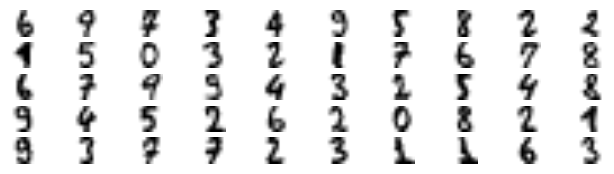

In [46]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [58]:
y_representative_digits = np.array([
    6, 9, 7, 3, 4, 9, 5, 8, 2, 2,
    1, 5, 0, 3, 2, 1, 7, 6, 7, 8,
    6, 7, 9, 9, 4, 3, 2, 5, 4, 8,
    9, 4, 5, 2, 6, 2, 0, 8, 2, 1,
    9, 3, 7, 7, 2, 3, 1, 1, 6, 3])

In [59]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=48)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9133333333333333

In [60]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [61]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=48)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9266666666666666

In [62]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [63]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=48)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9155555555555556

In [64]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896193771626297

In [65]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=48)

In [66]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [67]:
dbscan.labels_

array([ 0,  1,  0,  2,  3,  1,  3,  3,  0,  1,  7,  0,  1,  1,  0,  1,  2,
       -1,  0,  1,  1,  3,  1,  0,  0,  2,  4,  4,  5,  1,  0,  0,  0,  1,
        0,  1,  0,  1,  0,  0,  2, -1,  4,  0,  0,  5,  5,  3,  3,  1,  0,
        3,  0,  1,  1,  0,  3,  3,  0,  0,  3,  0,  5,  5,  0,  5,  1,  0,
        3, -1,  1,  1,  2,  4,  0,  1, -1,  1,  1,  3,  1,  2,  4,  0,  5,
        1,  0, -1,  5,  0,  1,  0,  0,  0,  1,  4,  0,  1, -1,  1,  1,  1,
        5,  4,  1,  1,  0,  5,  4,  5,  0,  0,  0,  3,  1,  0,  0,  1,  3,
        1,  3,  0, -1,  4, -1, -1,  1,  3,  4,  1,  0,  1,  0,  0,  0,  5,
       -1,  0,  0,  5,  0,  0,  0,  1,  0,  1,  0,  5,  5,  2,  1,  0,  5,
        0, -1,  0,  0,  1, -1,  0,  6,  0,  4,  0,  0,  6,  1,  5,  0,  0,
        5,  0,  0, -1,  0,  3,  5,  1,  0,  0,  1,  4,  0,  0,  5,  2, -1,
        1,  1,  0,  1,  0,  5,  0,  0,  0,  0,  5,  3, -1,  1,  5,  0,  1,
        0,  1,  0,  0,  0,  0,  5,  0,  0,  3,  0,  1,  0,  0,  1,  1,  3,
        4,  1,  0,  5,  2

In [68]:
len(dbscan.core_sample_indices_)

797

In [70]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  13,  14,
        15,  16,  18,  19,  22,  23,  25,  26,  27,  28,  29,  30,  32,
        34,  35,  36,  37,  38,  39,  40,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  53,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  70,  71,  72,  74,  75,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  88,  89,  90,  92,  93,  94,  95,
        96,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 127,
       129, 130, 131, 132, 133, 134, 137, 139, 140, 141, 142, 144, 146,
       147, 148, 149, 150, 151, 152, 153, 155, 157, 159, 161, 162, 163,
       164, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179,
       181, 182, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212,
       213, 214, 216, 217, 218, 220, 221, 222, 223, 224, 225, 22

In [71]:
dbscan.components_

array([[ 1.61886093, -0.31070257],
       [-1.00819204,  0.17332714],
       [ 1.57634139, -0.28307191],
       ...,
       [-0.59762656,  0.8706515 ],
       [ 0.06245895,  0.17610449],
       [-0.01275593,  0.45786387]])

In [72]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [73]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

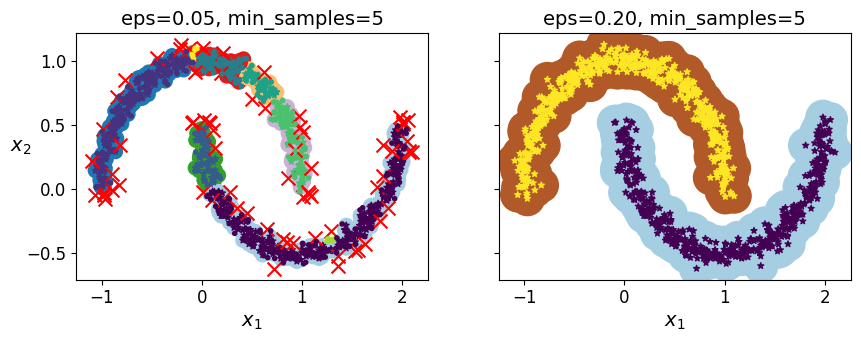

In [75]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [76]:
dbscan = dbscan2

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [78]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [79]:
knn.predict_proba(X_new)

array([[0.26, 0.74],
       [1.  , 0.  ],
       [0.2 , 0.8 ],
       [1.  , 0.  ]])

In [81]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

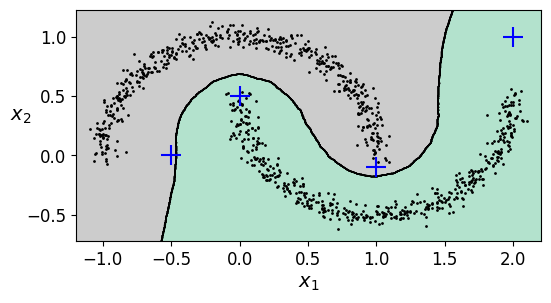

In [80]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [132]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=48)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=48)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [133]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=48)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=48)

In [134]:
gm.weights_

array([0.39362495, 0.24451553, 0.36185952])

In [135]:
gm.means_

array([[ 0.01291838, -0.00907664],
       [-3.45220702, -0.17483974],
       [-1.26134145,  1.65743084]])

In [136]:
gm.covariances_

array([[[0.65420778, 0.73485944],
        [0.73485944, 1.12879479]],

       [[1.09166331, 0.05589138],
        [0.05589138, 1.09557477]],

       [[0.6642487 , 0.75761764],
        [0.75761764, 1.19176369]]])

In [137]:
gm.converged_

True

In [138]:
gm.n_iter_

8

In [139]:
gm.predict(X)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [140]:
gm.predict_proba(X)

array([[9.93559288e-01, 5.33334216e-03, 1.10736952e-03],
       [9.99819022e-01, 1.80977863e-04, 2.59463380e-13],
       [9.97168023e-01, 2.63219102e-03, 1.99785541e-04],
       ...,
       [4.20930469e-15, 9.95845812e-01, 4.15418829e-03],
       [1.07579934e-28, 9.99999668e-01, 3.31744243e-07],
       [2.04463188e-19, 9.99351190e-01, 6.48809771e-04]])

In [141]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.93293033, -0.1609382 ],
       [-3.75492009,  1.06847895],
       [-4.13645872,  0.72048885],
       [-2.42035334,  1.92122311],
       [-2.42258513, -0.21970414],
       [-2.74311876, -1.03947702]])

In [142]:
y_new

array([1, 1, 1, 1, 2, 2])

In [143]:
gm.score_samples(X)

array([-3.44680816, -5.1140013 , -2.98815133, ..., -4.40791145,
       -4.19560821, -3.5242676 ])

In [144]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

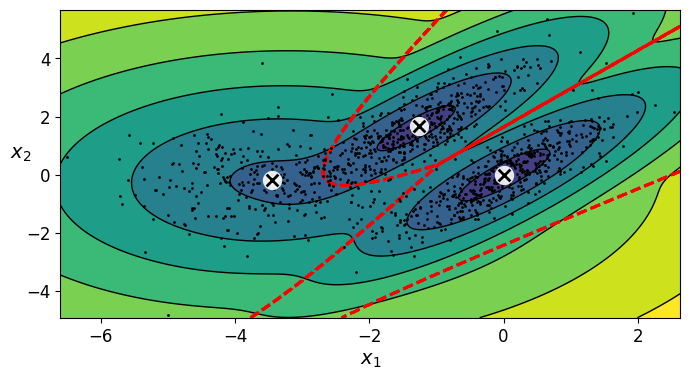

In [145]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

In [146]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=48)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=48)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=48)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=48)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=48)

In [147]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

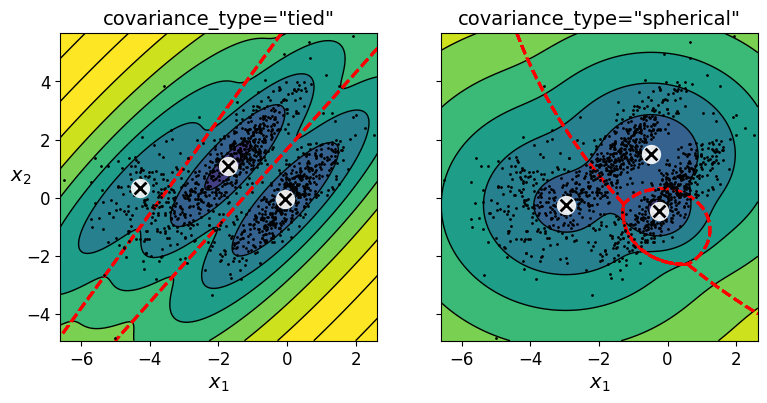

In [148]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

In [150]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

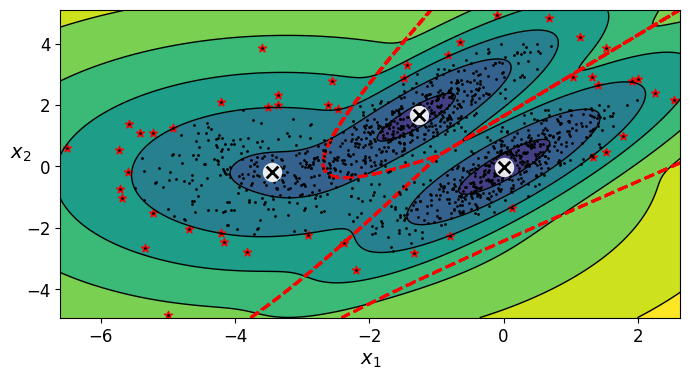

In [151]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

In [152]:
gm.bic(X)

8116.013930681112

In [153]:
gm.aic(X)

8028.788650566074

In [154]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [155]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

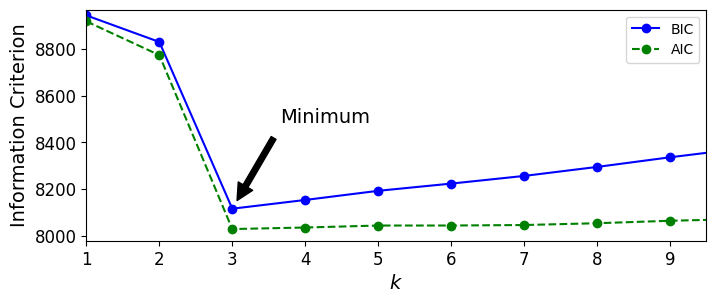

In [156]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [159]:
from sklearn.mixture import BayesianGaussianMixture

bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

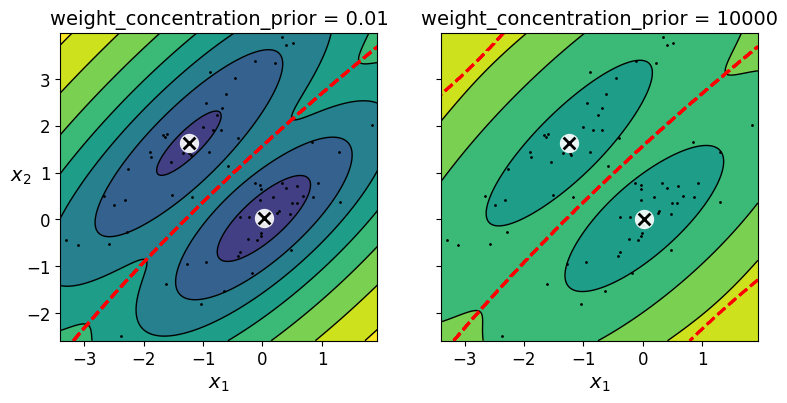

In [160]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [161]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=48)
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=48)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=48)

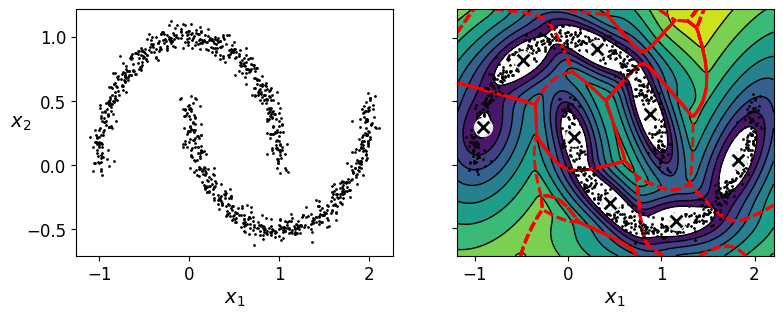

In [162]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()